# Spine Abnormality Detection Using ANN
Created at 10/11/2023

#### Dataset
**`dataset_spine.csv`: https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset**

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:
- The large nerve roots in the low back that go to the legs may be irritated
- The smaller nerves that supply the low back may be irritated
- The large paired lower back muscles (erector spinae) may be strained
- The bones, ligaments or joints may be damaged
- An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability. 

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort. 

This data set is about to identify a person is abnormal or normal using collected physical spine details/data with the aim of forming an Artifical Neural Network architecture to help companies in the health sector determine whether someone has lower back pain.

In [1]:
import pandas as pd

### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset dari data .csv dengan nama file "dataset_spine.csv"
spine = pd.read_csv('/content/drive/MyDrive/deeplearning/dataset_spine.csv')

# Hapus kolom pertama dari dataset (kolom yang tidak diperlukan)
spine.drop(columns="Unnamed: 0", axis=1, inplace=True)

# Menampilkan preview dari dataset
spine

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


### The given dataset has several problems, preprocess the data to solve the problems from the data. Do the Exploratory Data Analysis (EDA) to understand the problem.

In [4]:
# Melihat jumlah dan tipe data untuk masing-masing kolom dataset
spine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


Dataset spine terdiri dari 12 variabel x numerik dan 1 variabel y kategorik (Class_att). Data terdiri dari 310 baris.

In [5]:
# Melihat numerical summary dari dataset
spine.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Describe dari data frame menampilkan numerical summary seperti seperti rata-rata, nilai min, dan nilai max masing-masing kolom variabel.

In [6]:
# Melihat class apa saja yang ada pada variabel y (Class_att)
spine["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

Variabel y dataset spine terbagi menjadi dua (2) class atau label, yaitu 'Abnormal' dan 'Normal'.

In [7]:
# Melihat jumlah data masing-masing class "Abnormal" dan "Normal" untuk mengetahui apakah terjadi data imbalance
spine["Class_att"].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

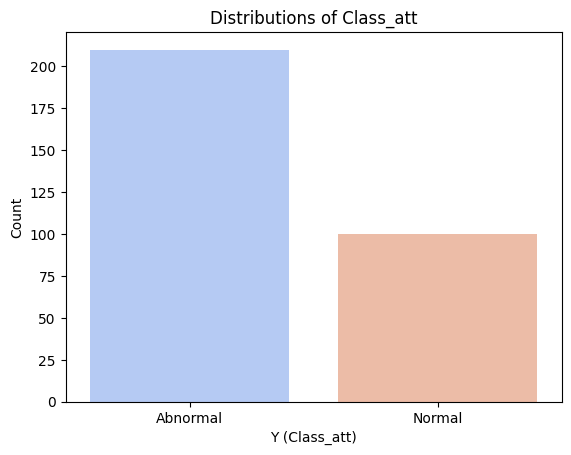

In [9]:
plt.title("Distributions of Class_att")
sns.countplot(x = 'Class_att', data=spine, palette = "coolwarm")
plt.ylabel("Count")
plt.xlabel("Y (Class_att)")
plt.show()

Dari masing-masing class, class 'Abnormal' memiliki jumlah value sebanyak 210 dan class 'Normal' memiliki jumlah value sebanyak 100. Apabila dilihat dari sebaran data menurut variabel y nya, dapat disimpulkan bahwa terjadi problem yaitu **data imbalance**. Oleh karena itu, solusi yang nanti dapat ditawarkan yaitu melakukan **resampling (oversampling)** setelah data splitting.

In [10]:
# Cek missing value
sum(spine.isnull().sum())

0

Dataset spine tidak menunjukkan adanya missing value baik di variabel x maupun y. Oleh karena itu, handling missing value tidak perlu dilakukan.

In [11]:
# Melakukan label encoding
# Hal ini salah karena seharusnya dengan fungsi softmax menggunakan one hot encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
spine["Class_att"] = le.fit_transform(spine["Class_att"])
spine

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,1


Variabel y (Class_att) merupakan variabel kategorik sehingga perlu dilakukan handling categorical data. Teknik yang dipilih yaitu label encoding dengan mengubah kategori ke dalam format numerik. Class 'Abnormal' menjadi '0' dan class 'Normal' menjadi '1'.

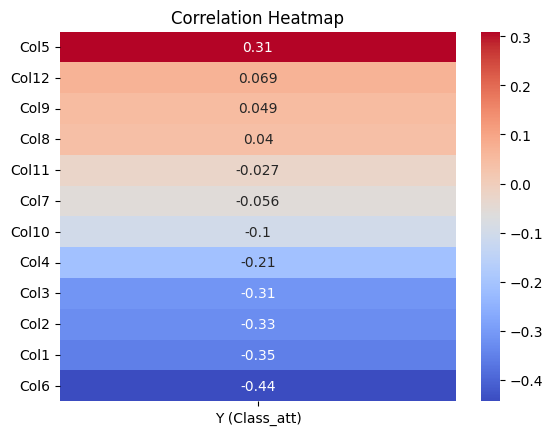

In [12]:
# Membuat correlation heatmap untuk melihat korelasi antara variabel x terhadap variabel y (Class_att)
var_x = spine.columns[spine.columns != 'Class_att']
correlations = spine[var_x].corrwith(spine['Class_att']).sort_values(ascending=False)
corr_df = correlations.to_frame(name='Y (Class_att)')

# plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

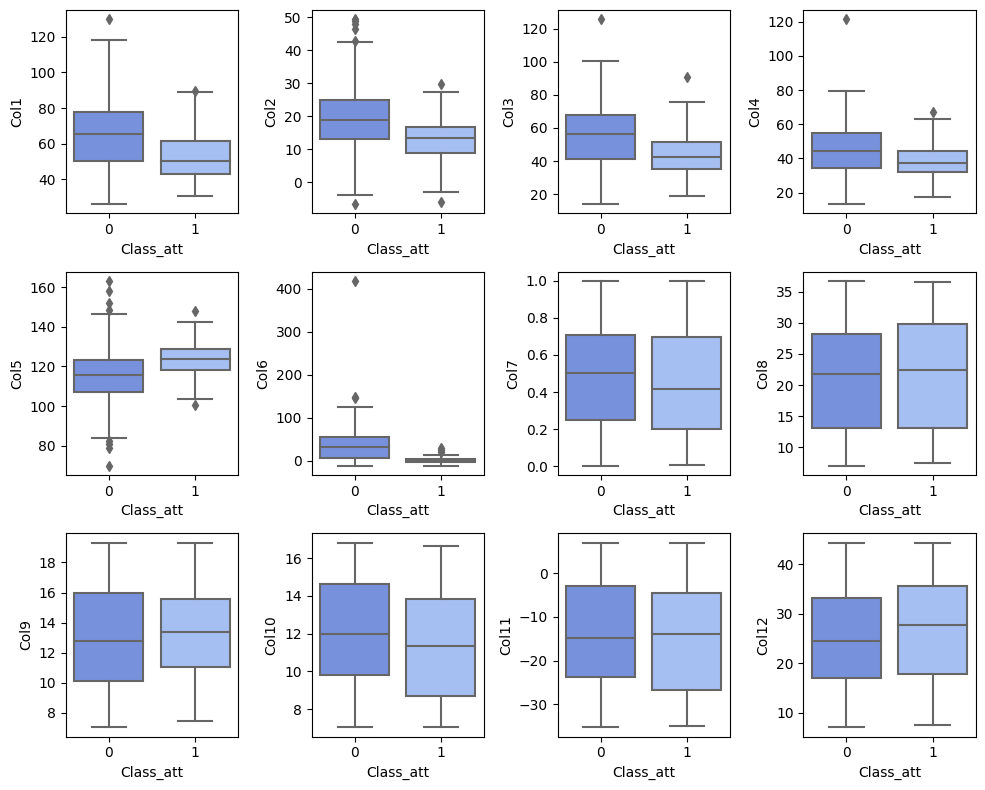

In [13]:
# Membuat boxplot masing-masing variabel untuk melihat keberadaan outlier
sns.set_palette("coolwarm")
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for i, column in enumerate(spine.columns[:-1]):
    row = i // 4
    col = i % 4
    sns.boxplot(x=spine['Class_att'], y=spine[column], ax=axes[row, col])
    axes[row, col].set_ylabel(spine.columns[i])
    axes[row, col].set_xlabel('Class_att')

plt.tight_layout()
plt.show()

In [14]:
import numpy as np

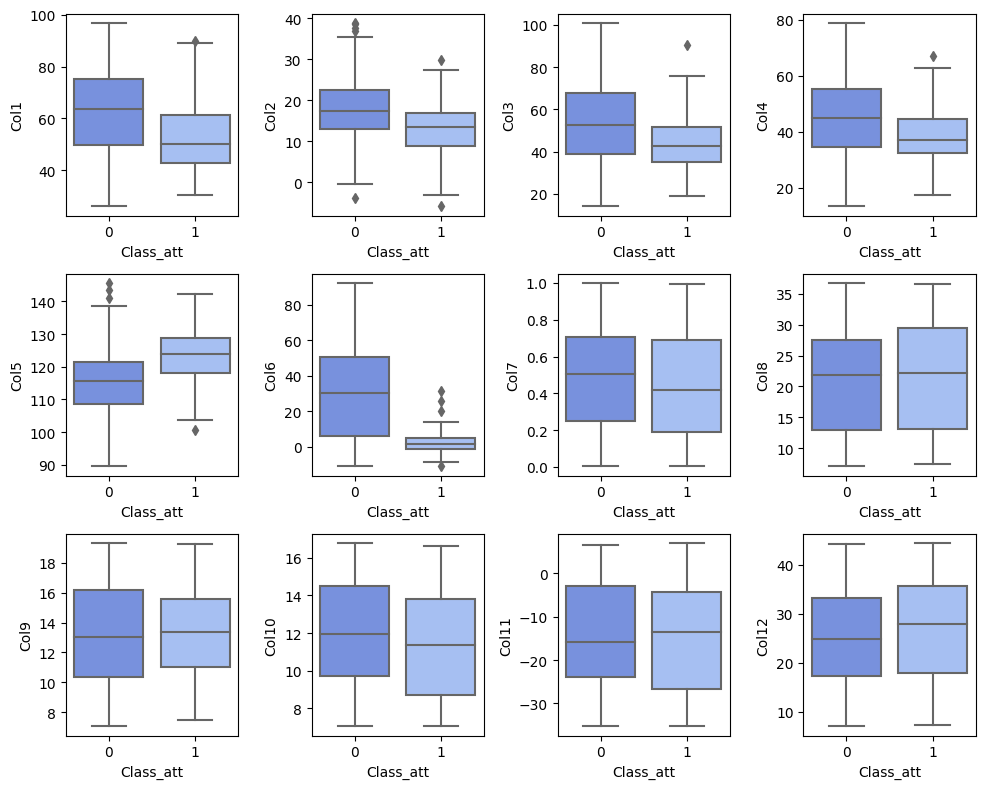

In [15]:
for col in spine.columns[:-1]:
    Q1 = spine[col].quantile(0.25)
    Q3 = spine[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    spine = spine[(spine[col] > lower) & (spine[col] < upper)]

    # upperidx = np.where(spine[col] >= upper)[0]
    # loweridx = np.where(spine[col] <= lower)[0]

    # spine.drop(index = upperidx, inplace=True)
    # spine.drop(index = loweridx, inplace=True)


# Membuat boxplot masing-masing variabel untuk melihat keberadaan outlier
sns.set_palette("coolwarm")
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for i, column in enumerate(spine.columns[:-1]):
    row = i // 4
    col = i % 4
    sns.boxplot(x=spine['Class_att'], y=spine[column], ax=axes[row, col])
    axes[row, col].set_ylabel(spine.columns[i])
    axes[row, col].set_xlabel('Class_att')

plt.tight_layout()
plt.show()

In [16]:
spine

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,1


### Split the dataset into train, test, and validation with the following ratio: 80% train, 10% test, and 10% validation.

In [17]:
# Memisahkan variabel x dan y
y = spine.Class_att
X = spine.drop(columns=['Class_att'])
# X = spine.drop(columns=['Class_att', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split dataset menjadi 80% untuk data training, 10% untuk data validation, dan 10% untuk data testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5)

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Melakukan oversampling terhadap data train setelah data splitting
train = pd.concat([X_train, y_train], axis=1)
abnormal = train[train['Class_att'] == 0]
normal = train[train['Class_att'] == 1]

# Menampilkan distribusi awal data train
print(f'Class 0: {len(abnormal)}')
print(f'Class 1: {len(normal)}')

# Oversample class/label 1 (minority class) mengikuti ukuran class/label 1 (majority class)
normal = normal.sample(len(abnormal), replace=True)
train = pd.concat([abnormal, normal])

X_train = train.drop('Class_att', axis=1)
y_train = train['Class_att']

# Menampilkan distribusi data train setelah berhasil dilakukan oversample
print(f'Class 0: {len(abnormal)}')
print(f'Class 1: {len(normal)}')

Class 0: 143
Class 1: 77
Class 0: 143
Class 1: 143


### Create an Artificial Neural Network architecture

The architecture consists of 3 hidden layers with each hidden layer uses **sigmoid activation function**. The output layer uses **softmax activation function**. 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Membuat arsitektur neural retwork
model = Sequential()

# Input layer
model.add(Dense(units = 12, activation = "sigmoid", input_shape = (X_train.shape[1],)))
# 12 -> jumlah features, X_train.shape[1],)) -> jumlah kolom inputnya

# Hidden layer
model.add(Dense(units = 512, activation = "sigmoid"))
model.add(Dense(units = 256, activation = "sigmoid"))
model.add(Dense(units = 128, activation = "sigmoid"))

# Output layer
model.add(Dense(units = 2, activation = "softmax"))
# 2 -> jumlah label output, menggunakan activation softmax dan loss categorical

In [24]:
# Mengkonfigurasi model untuk proses training
# Hal ini salah karena seharusnya one hot encoding menggunakan loss function categorical atau binary cross entropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

# Menampilkan summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 512)               6656      
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 171294 (669.12 KB)
Trainable params: 171294 (669.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Sklearn model.fit untuk training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/50
9/9 [==============================] - 2s 38ms/step - loss: 0.8100 - accuracy: 0.5000 - val_loss: 0.6210 - val_accuracy: 0.7500
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.7234 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.7060 - accuracy: 0.5280 - val_loss: 0.7190 - val_accuracy: 0.2500
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.7099 - accuracy: 0.4860 - val_loss: 0.6511 - val_accuracy: 0.7500
Epoch 5/50
9/9 [==============================] - 0s 23ms/step - loss: 0.7223 - accuracy: 0.4720 - val_loss: 0.7285 - val_accuracy: 0.2500
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.7282 - accuracy: 0.4930 - val_loss: 0.6488 - val_accuracy: 0.7500
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.7007 - accuracy: 0.5070 - val_loss: 0.7729 - val_accuracy: 0.2500
Epoch 8/50
9/9 [===========

In [26]:
# Melihat loss dan akurasi dari data test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

1/1 [==============================] - 0s 27ms/step - loss: 0.4328 - accuracy: 0.8214
Test accuracy: 82.14%


### Display validation loss and training loss graphs

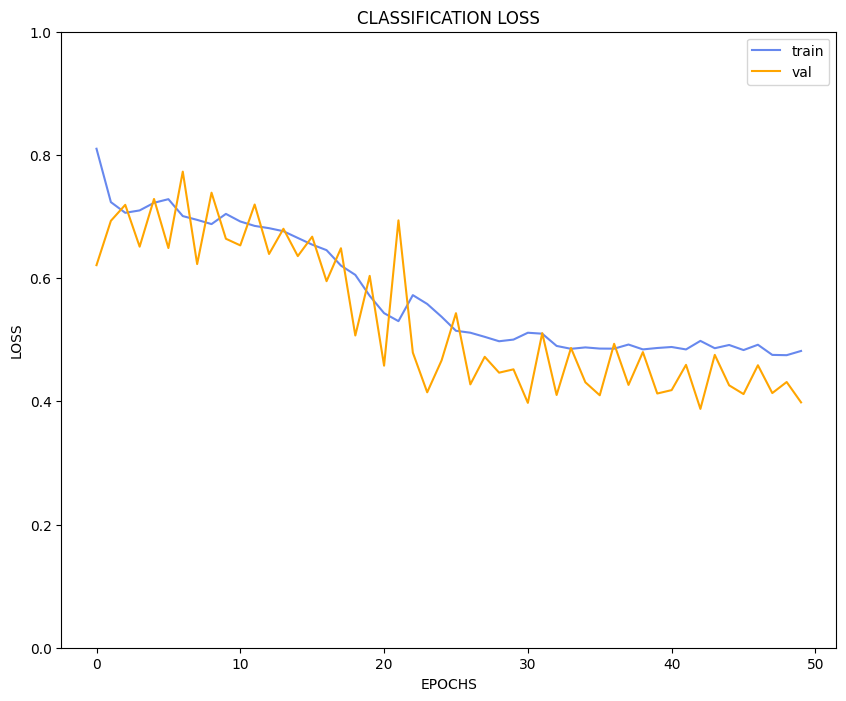

In [27]:
# Menampilkan plot validation loss dan training loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss'], 'orange');
plt.title("CLASSIFICATION LOSS");
plt.ylabel("LOSS");
plt.ylim([0,1.0]);
plt.xlabel("EPOCHS");
plt.legend(['train', 'val']);

Model arsitektur menghasilkan akurasi sebesar 82.14% ketika dilakukan testing. Plot validation loss dan training loss menunjukkan bahwa model underfit karena validation loss yang berkisar di angka 0.40 lebih kecil dari training loss yang berkisar di angka 0.48. Artinya, model masih terlalu sederhana untuk memprediksi data yang lebih kompleks.


### Modify the Artificial Neural Network architecture to get better accuracy

In [28]:
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dense, Dropout

In [100]:
# Melakukan modifikasi terhadap model lama untuk optimalisasi akurasi
model2 = Sequential()

# Input layer
# Mengubah activation function menjadi relu agar model lebih cepat mencapai konvergen
# L2 regularization untuk meningkatkan kemampuan generalisasi model
model2.add(Dense(units = 12, activation = "relu", input_shape = (X_train.shape[1],), kernel_regularizer=l2(0.01)))
# Dropout untuk menhindari overfitting
model2.add(Dropout(0.2))

# Hidden layer
# Memperbanyak jumlah layer untuk mengatasi underfitting
# L2 regularization untuk meningkatkan kemampuan generalisasi model
# model1.add(Dense(units = 1024, activation = "relu", kernel_regularizer=l2(0.1)))
model2.add(Dense(units = 512, activation = "relu", kernel_regularizer=l2(0.1)))
model2.add(Dense(units = 256, activation = "relu", kernel_regularizer=l2(0.05)))
model2.add(Dropout(0.2))
model2.add(Dense(units = 128, activation = "relu", kernel_regularizer=l2(0.05)))
model2.add(Dropout(0.2))
model2.add(Dense(units = 64, activation = "relu", kernel_regularizer=l2(0.05)))
model2.add(Dense(units = 32, activation = "relu", kernel_regularizer=l2(0.01)))
# model1.add(Dense(units = 16, activation = "relu", kernel_regularizer=l2(0.01)))

# Output layer
model2.add(Dense(units = 2, activation = "softmax"))

In [101]:
# Memperkecil learning rate agar proses learning model menjadi lebih stabil
model2.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
             )

In [102]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [107]:
# Melakukan early stopping agar training berhenti ketika val loss berhenti menurun
# Tujuannya untuk menghemat waktu training dan menghindari overfitting
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=15,
                              restore_best_weights=True
                             )

# Menyimpan suatu model dalam proses training ketika model mencapai kinerja terbaik
# Tujuannya agar model terakhir menggunakan weight paling optimal
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True
                              )

# Mengurangi learning rate ketika val loss berhenti menurun
# Tujuannya untuk mengatasi underfitting dan membuat learning rate fleksibel (adapting)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=2,
                              min_lr=0.001,
                              factor=0.2
                             )

callbacks = [checkpointer, earlystopping, reduce_lr]

In [104]:
# Sklearn model.fit untuk training data
history2 = model2.fit(X_train, y_train, epochs = 150, batch_size = 32, validation_data = (X_val, y_val), callbacks = callbacks)

Epoch 1/150
1/9 [==>...........................] - ETA: 7s - loss: 34.1781 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 28.31147, saving model to model.h5
9/9 [==============================] - 1s 26ms/step - loss: 31.5503 - accuracy: 0.5524 - val_loss: 28.3115 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 2/150
1/9 [==>...........................] - ETA: 0s - loss: 28.4020 - accuracy: 0.7188
Epoch 2: val_loss improved from 28.31147 to 24.07644, saving model to model.h5
9/9 [==============================] - 0s 9ms/step - loss: 26.5067 - accuracy: 0.6189 - val_loss: 24.0764 - val_accuracy: 0.6786 - lr: 0.0010
Epoch 3/150
1/9 [==>...........................] - ETA: 0s - loss: 24.1596 - accuracy: 0.5625
Epoch 3: val_loss improved from 24.07644 to 20.16094, saving model to model.h5
9/9 [==============================] - 0s 9ms/step - loss: 22.3580 - accuracy: 0.6643 - val_loss: 20.1609 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 4/150
1/9 [==>...........................] - ETA: 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 20.16094 to 17.05471, saving model to model.h5
9/9 [==============================] - 0s 11ms/step - loss: 18.9164 - accuracy: 0.6119 - val_loss: 17.0547 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/150
9/9 [==============================] - ETA: 0s - loss: 16.0583 - accuracy: 0.6084
Epoch 5: val_loss improved from 17.05471 to 14.45082, saving model to model.h5
9/9 [==============================] - 0s 16ms/step - loss: 16.0583 - accuracy: 0.6084 - val_loss: 14.4508 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 6/150
1/9 [==>...........................] - ETA: 0s - loss: 14.5987 - accuracy: 0.5938
Epoch 6: val_loss improved from 14.45082 to 12.38913, saving model to model.h5
9/9 [==============================] - 0s 12ms/step - loss: 13.6131 - accuracy: 0.6713 - val_loss: 12.3891 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 7/150
1/9 [==>...........................] - ETA: 0s - loss: 12.4677 - accuracy: 0.7188
Epoch 7: val_loss improved from 12.38913 to 10.6195

In [105]:
# Melihat loss dan akurasi dari data test setelah model dimodifikasi
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

1/1 [==============================] - 0s 17ms/step - loss: 0.4689 - accuracy: 0.8571
Test accuracy: 85.71%


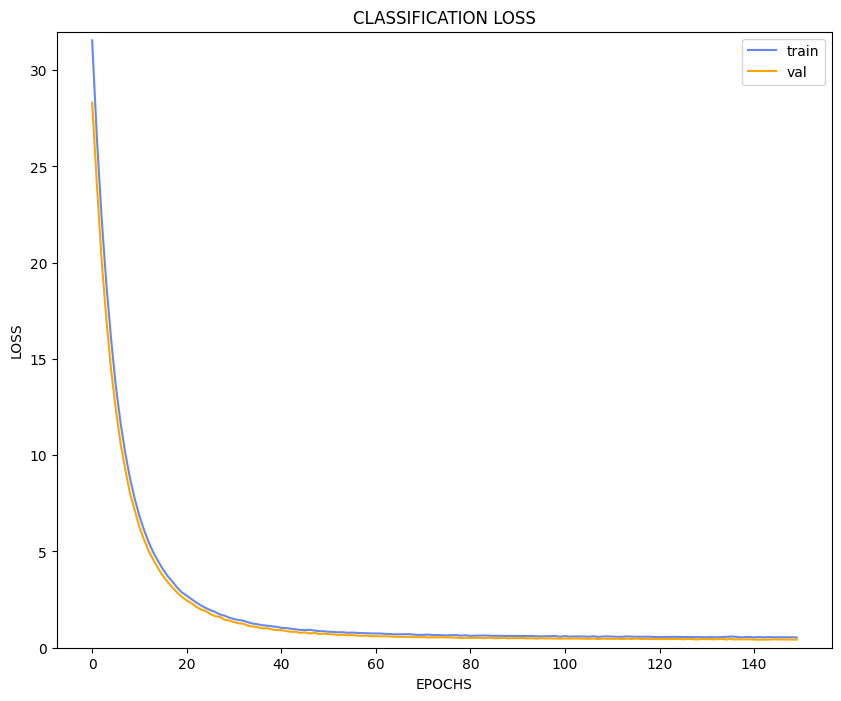

In [106]:
# Menampilkan plot validation loss dan training loss setelah model dimodifikasi
plt.figure(figsize=(10,8))
plt.plot(history2.history['loss']);
plt.plot(history2.history['val_loss'], 'orange');
plt.title("CLASSIFICATION LOSS");
plt.ylabel("LOSS");
plt.ylim([0,32]);
plt.xlabel("EPOCHS");
plt.legend(['train', 'val']);

Model arsitektur yang baru menghasilkan akurasi optimal sebesar 85.71% ketika dilakukan testing. Plot validation loss dan training loss menunjukkan bahwa model mengalami sedikit underfit atau bisa menjadi good fit karena validation loss yang berkisar di angka 0.42 tidak jauh berbeda dari training loss yang berkisar di angka 0.55. Model dengan weight terbaik diperoleh pada epoch ke 142 dan training berhenti di epoch terakhir sehingga early stopping tidak menghentikan training di tengah proses.

### Evaluate the performance of both architectures on the test set by computing the accuracy, precision, recall and F1-Score values

In [36]:
# Melakukan prediksi model awal terhadap data testing
prediction = model.predict(X_test)

pred = np.argmax(prediction, axis=1)
original = y_test

1/1 [==============================] - 0s 66ms/step


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# Melihat nilai akurasi model awal
accuracy = accuracy_score(original, pred)
accuracy

0.8214285714285714

Secara keseluruhan, model awal benar dalam memprediksi kelas sebesar 82.14%.

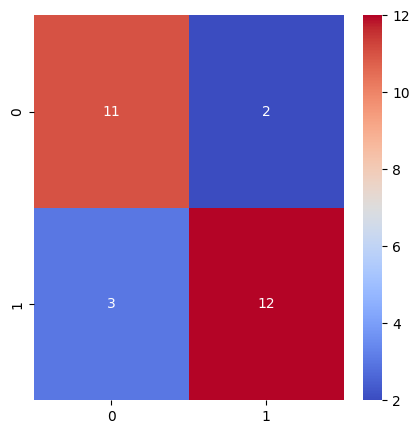

In [39]:
# Menampilkan confusion matrix model awal untuk melihat distribusi prediksi yang benar dan salah untuk class/label 0 dan 1
cm = confusion_matrix(original, pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, cmap="coolwarm");

Confusion matrix model awal mengindikasikan bahwa model memprediksi benar 12 data sebagai class 1, memprediksi benar 11 data sebagai class 0, keliru memprediksi 2 data sebagai class 1, dan keliru memprediksi 3 data sebagai class 0.

In [40]:
# Evaluasi kinerja model awal melalui nilai akurasi, presisi, recall, dan F1 score
print(classification_report(original, pred, digits = 5))

              precision    recall  f1-score   support

           0    0.78571   0.84615   0.81481        13
           1    0.85714   0.80000   0.82759        15

    accuracy                        0.82143        28
   macro avg    0.82143   0.82308   0.82120        28
weighted avg    0.82398   0.82143   0.82166        28



**Class/label 0** <br>
Precision: Dari semua data yang diprediksi sebagai class 0, 78.57% memang benar merupakan class 0. <br>
Recall: Dari semua data yang sebenarnya class 0, 84.62% di antaranya berhasil diprediksi sebagai class 0. <br>
F1-Score: Rerata dari nilai precision dan recall untuk class 0 yaitu 81.48%. <br>

<br>

**Class/label 1** <br>
Precision: Dari semua data yang diprediksi sebagai class 1, 85.71% memang benar merupakan class 1. <br>
Recall: Dari semua data yang sebenarnya class 1, 80% di antaranya berhasil diprediksi sebagai class 1. <br>
F1-Score: Rerata dari nilai precision dan recall untuk class 1 yaitu 82.76%.

In [41]:
# Melakukan prediksi model yang sudah dimodifikasi terhadap data testing
prediction = model2.predict(X_test)

pred = np.argmax(prediction, axis=1)
original = y_test

1/1 [==============================] - 0s 51ms/step


In [42]:
# Melihat nilai akurasi model yang sudah dimodifikasi
accuracy = accuracy_score(original, pred)
accuracy

0.8928571428571429

Secara keseluruhan, model baru benar dalam memprediksi sebesar 89.29%.

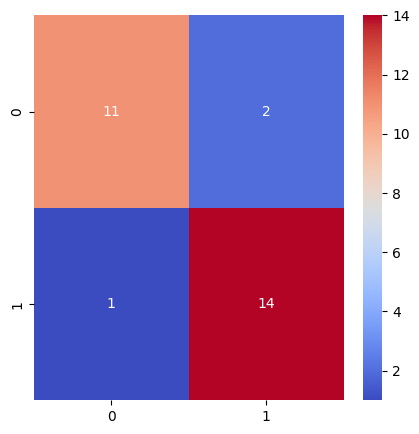

In [43]:
# Menampilkan confusion matrix model yang sudah dimodifikasi untuk melihat distribusi prediksi yang benar dan salah untuk class/label 0 dan 1
cm = confusion_matrix(original, pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, cmap="coolwarm");

Confusion matrix model yang sudah dimodifikasi mengindikasikan bahwa model memprediksi benar 14 data sebagai class 1, memprediksi benar 11 data sebagai class 0, keliru memprediksi 2 data sebagai class 1, dan keliru memprediksi 1 data sebagai class 0.

In [44]:
# Evaluasi kinerja model yang sudah dimodifikasi melalui nilai akurasi, presisi, recall, dan F1 score
print(classification_report(original, pred, digits = 5))

              precision    recall  f1-score   support

           0    0.91667   0.84615   0.88000        13
           1    0.87500   0.93333   0.90323        15

    accuracy                        0.89286        28
   macro avg    0.89583   0.88974   0.89161        28
weighted avg    0.89435   0.89286   0.89244        28



**Class/label 0** <br>
Precision: Dari semua data yang diprediksi sebagai class 0, 91.67% memang benar merupakan class 0. <br>
Recall: Dari semua data yang sebenarnya class 0, 84.62% di antaranya berhasil diprediksi sebagai class 0. <br>
F1-Score: Rerata dari nilai precision dan recall untuk class 0 yaitu 88%. <br>

<br>

**Class/label 1** <br>
Precision: Dari semua data yang diprediksi sebagai class 1, 87.5% memang benar merupakan class 1. <br>
Recall: Dari semua data yang sebenarnya class 1, 93.33% di antaranya berhasil diprediksi sebagai class 1.
F1-Score: Rerata dari nilai precision dan recall untuk class 1 yaitu 90.32%.

Model awal memiliki recall yang sama pada class/label 0 dengan model baru. Meskioun demikian, nilai rata-rata precision, recall, dan F1 score model baru terbilang lebih tinggi daripada model yang lama. Secara keseluruhan, **model yang sudah dimodifikasi memiliki rata-rata metrics lebih tinggi** yaitu 89.58% dibanding dengan model awal yaitu 82.14%. <br><br>
Jika melihat nilai akurasi dan matriks konfusi, model baru memiliki keakuratan yang lebih baik dibanding model awal dalam memprediksi data yang baru dilihat. Model baru cenderung menghasilkan kesalahan prediksi yang lebih sedikit, terutama pada class/label 1 dibandingkan dengan model awal yang masih banyak salah memprediksi.